<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/Neural_Network_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Import the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Creatures features and labels

In [4]:
X = insurance.drop("charges", axis=1)

y = insurance["charges"]
X.head(5), y.head(5)

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest, 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

# Preprocessing data (normalization & standardization)

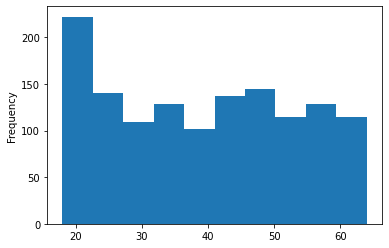

In [5]:
X["age"].plot(kind="hist")

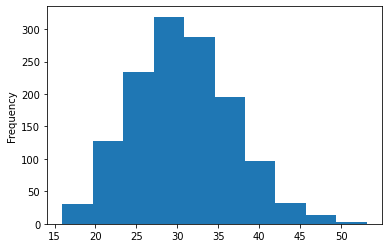

In [6]:
X["bmi"].plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06cc08f190>,
      dtype=object)

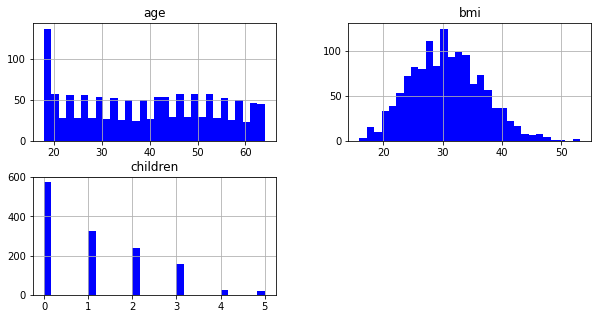

In [7]:
# Plot graph to see the data distribution
X.hist(bins=30, figsize=(10,5), color="b")

# Import classes from scikitlearn to normalize the data

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) 
)

# Create Training and Test set

In [12]:
# Import TrainTest split for scikitlearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [13]:
# Use the column transformer to transform the data

X_train = ct.fit_transform(X_train)

X_test = ct.transform(X_test)

In [16]:
X_train[0], y_train[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]), 16884.924)

In [17]:
X_train.shape

(1070, 11)

# Create a Neural Network Model

In [21]:
# Build a model
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])

# 3. Fit the model
history = insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [22]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [23]:
# Check the central tendency of the data
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [24]:
# Model summary
insurance_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


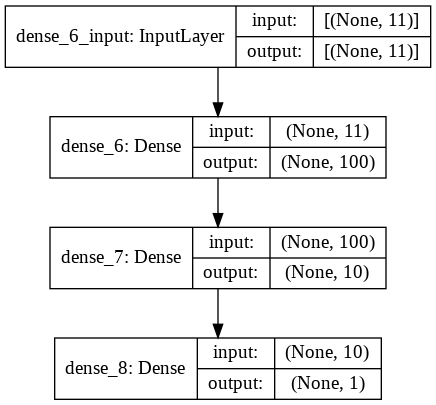

In [28]:
# Check the model graphically
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_model, show_shapes=True, show_layer_names=True)

# Evaluate the model

In [30]:
# Prediction of the model
y_pred = insurance_model.predict(X_test)

In [34]:
y_pred.ndim, y_test.ndim

(2, 1)

In [35]:
# Check the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

# Check the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=3438.7844>,
 <tf.Tensor: shape=(), dtype=float32, numpy=41750904.0>)

# Visualize the model history or the loss curve

Text(0, 0.5, 'Loss')

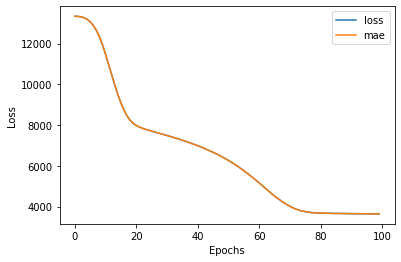

In [36]:
pd.DataFrame(history.history).plot()

plt.xlabel("Epochs")
plt.ylabel("Loss")